In [2]:
import sys
project_root = "/home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch"
if project_root not in sys.path:
    sys.path.insert(0, project_root)


In [2]:
from biobb_pytorch.mdae.mdfeaturizer import MDFeaturizer

# Inputs
input_trajectory_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.dcd"
input_topology_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb"

# Opcional inputs
input_labels_file = None
input_weights_file = None

# Outputs
output_file = "1NE4_6NO7_b.dcd.pt"
output_stats_file = "1NE4_6NO7_b.dcd.stats.pt"

properties = {
    'cartesian': {'selection': 'backbone'},
    'distances': {'selection': 'name CA', 
                  'cutoff': 0.4, 
                  'periodic': True,
                  'bonded': False},
    # 'angles': {'selection': 'backbone', 
    #            'periodic': True, 
    #            'bonded': True},
    # 'dihedrals': {'selection': 'backbone', 
    #               'periodic': True, 
    #               'bonded': True},
    'options': {'timelag': 10}, 
    #             'norm_in': {'mode': 'min_max'}
    #             },
    
    'remove_tmp': True,
    'disable_sandbox': True,
    'disable_logs': True,   # No va
}

MDFeaturizer(
    input_trajectory_path=input_trajectory_file,
    input_topology_path=input_topology_file,
    input_labels_npy_path=input_labels_file,
    input_weights_npy_path=input_weights_file,
    output_dataset_pt_path=output_file,
    output_stats_pt_path=output_stats_file,
    properties=properties
)


/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


2025-09-01 09:16:52,912 [MainThread  ] [INFO ]  ## BioBB Featurization - MDFeaturePipeline ##
2025-09-01 09:16:52,912 [MainThread  ] [INFO ]  Obtaining the topology information from /home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb
2025-09-01 09:16:52,938 [MainThread  ] [INFO ]  Available Topology Properties:
2025-09-01 09:16:52,939 [MainThread  ] [INFO ]    - Number of chains: 1
2025-09-01 09:16:52,939 [MainThread  ] [INFO ]    - Number of residues: 268
2025-09-01 09:16:52,939 [MainThread  ] [INFO ]    - Number of atoms: 268
2025-09-01 09:16:52,940 [MainThread  ] [INFO ]    - Number of distances: 35778
2025-09-01 09:16:52,940 [MainThread  ] [INFO ]    - Number of angles: N/A
2025-09-01 09:16:52,940 [MainThread  ] [INFO ]    - Number of dihedrals: N/A
2025-09-01 09:16:52,950 [MainThread  ] [INFO ]  Available Trajectory Properties:
2025-09-01 09:16:52,951 [MainThread  ] [INFO ]     - Number of frames: 275
2025-09-01 09:16:52,951 [MainThread  ] [INFO ]  Featurizing 

/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/biobb_common/generic/biobb_object.py:154: UserWarning: Warning: disable_logs is not a recognized property. The most similar property is: disable_sandbox
  warnings.warn(


0

In [3]:
import sys
project_root = "/home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch"
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from biobb_pytorch.mdae.make_plumed import generatePlumed

# Inputs
input_model_pth_file = "test_model.pth"
input_ndx_file = None
input_reference_pdb_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb"
input_stats_pt_file = "1NE4_6NO7_b.dcd.stats.pt"

# Outputs
output_model_ptc_file = "test_model.ptc"
output_plumed_file = "plumed.dat"
output_plumed_feature_file = "features.dat" 

properties = {
                "additional_actions": [
                    {
                        "name": "ENERGY",
                        "label": "ene"
                    },
                ],
                "fit_to_template": {
                    "STRIDE": 1,
                    "TYPE": "OPTIMAL"
                },
                "group": {
                    "label": "backbone",
                    "selection": "backbone"
                },
                "bias": [
                    {
                        "name": "METAD",
                        "label": "bias",
                        "params": {
                            "ARG": "cv.*",
                            "PACE": 500,
                            "HEIGHT": 1.2,
                            "SIGMA": 0.35,
                            "FILE": "HILLS",
                            "BIASFACTOR": 8
                        }
                    }
                ],
                "prints": {
                    "ARG": "cv.*,bias.*",
                    "STRIDE": 1,
                    "FILE": "COLVAR"
                }
            }

generatePlumed(
    input_model_pth_path=input_model_pth_file,
    input_ndx_path=input_ndx_file,
    input_reference_pdb_path=input_reference_pdb_file,
    input_stats_pt_path=input_stats_pt_file,
    output_model_ptc_path=output_model_ptc_file,
    output_plumed_dat_path=output_plumed_file,
    output_features_dat_path=output_plumed_feature_file,
    properties=properties
)


2025-09-01 09:16:56,585 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.make_plumed Version: 5.0.0
2025-09-01 09:16:56,587 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/e692c083-685b-43dd-a6ed-805e8c1c3bd0
2025-09-01 09:16:56,588 [MainThread  ] [INFO ]  Copy: 1NE4_6NO7_b.dcd.stats.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/e692c083-685b-43dd-a6ed-805e8c1c3bd0
2025-09-01 09:16:56,589 [MainThread  ] [INFO ]  Copy: /home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/e692c083-685b-43dd-a6ed-805e8c1c3bd0
2025-09-01 09:16:56,590 [MainThread  ] [INFO ]  Found 268 Cartesian features.
2025-09-01 09:16:56,590 [MainThread  ] [INFO ]  Found 377 Distance features.
2025-09-01 09:16:56,591 [MainThread  ] [INFO ]  Using GROUP: backbone
2025-09-01 09:16

0

In [5]:
from biobb_pytorch.mdae.build_model import buildModel

input_stats_path = "1NE4_6NO7_b.dcd.stats.pt"
output_model_pth_file = "test_model.pth"

n_features = 1181

properties = {
    'model_type': 'AutoEncoder',
    'n_cvs': 2,
    'encoder_layers': [32, 16],
    'decoder_layers': [16, 32],
    'options': {
        'encoder': {'activation': 'relu', "last_layer_activation": False},
        'decoder': {'activation': 'relu', "last_layer_activation": "sigmoid"},
        'optimizer': {'lr': 1e-4},
        
        'loss_function': {
            'loss_type': 'MSELoss',
            }
    }
}

buildModel(input_stats_pt_path=input_stats_path,
           output_model_pth_path=output_model_pth_file,
           properties=properties)


2025-09-01 09:19:13,744 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.build_model Version: 5.0.0
2025-09-01 09:19:13,767 [MainThread  ] [INFO ]  Copy: 1NE4_6NO7_b.dcd.stats.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/ccefc835-e2b4-4bb2-87c1-5566f2910d7d
2025-09-01 09:19:13,770 [MainThread  ] [INFO ]  ## BioBB AutoEncoder Builder ##
2025-09-01 09:19:13,771 [MainThread  ] [INFO ]  
2025-09-01 09:19:13,771 [MainThread  ] [INFO ]  Hyperparameters:
2025-09-01 09:19:13,771 [MainThread  ] [INFO ]  ----------------
2025-09-01 09:19:13,772 [MainThread  ] [INFO ]  model_type: AutoEncoder
2025-09-01 09:19:13,772 [MainThread  ] [INFO ]  n_cvs: 2
2025-09-01 09:19:13,772 [MainThread  ] [INFO ]  encoder_layers: [32, 16]
2025-09-01 09:19:13,773 [MainThread  ] [INFO ]  decoder_layers: [16, 32]
2025-09-01 09:19:13,773 [MainThread  ] [INFO ]  loss_function: MSELoss()
2025-09-01 09:19:13,773 [MainThread  ] [INFO ]  options:
2025-09-01 09:19:13,774 [M

0

In [4]:
from biobb_pytorch.mdae.train_model import trainModel

properties = {
    'Dataset': {
        'batch_size': 4,
        'shuffle': True,
        'split': {'random_split': True,
                  'train_prop': 1.0,
                  'val_prop': 0.0,

        },
    },
    'Trainer': {
        'max_epochs': 100,
        'enable_checkpointing': False,
        'callbacks': {},
        
    },
    'disable_sandbox': True
}

# Inputs
input_model_pth_file = "test_model.pth"
input_dataset_pt_path = "1NE4_6NO7_b.dcd.pt"

# Outputs
output_model_pth_file = "test_model.pth"
output_model_metrics_file = "test_model_metrics.npz"

trainModel(
    input_model_pth_path=input_model_pth_file,
    input_dataset_pt_path=input_dataset_pt_path,
    output_model_pth_path=output_model_pth_file,
    output_metrics_npz_path=output_model_metrics_file,
    properties=properties
)


2025-08-01 01:21:15,463 [MainThread  ] [INFO ]  ## BioBB Model Trainer ##
2025-08-01 01:21:15,464 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.train_model Version: 5.0.0
2025-08-01 01:21:15,464 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-08-01 01:21:15,466 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/1NE4_6NO7_b.dcd.pt
2025-08-01 01:21:15,477 [MainThread  ] [INFO ]  Start training...


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/mlcolvar/data/datamodule.py:280: UserWarning: Length of split at index 1 is 0. This might result in an empty dataset.
  warnings.warn(

  | Name    | Type          | Params | Mode  | In sizes | Out sizes
-------------------------------------------------------------------------
0 | loss_fn | MSELoss       | 0      | train | ?        | ?        
1 | norm_in | Normalization | 0      | train | [1, 804] | [1, 804] 
2 | encoder | FeedForward   | 26.3 K | train | [1, 804] | [1, 2]   
3 | decoder | FeedForward   | 27.1 K | train | ?        | ?        
-------------------------------------------------------------------------
53.4 K    Trainable params
0         Non-trainable params
53.4 K    Total params
0.214     Total estimated model params size (MB)
17        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/lightning/pytorch/utilities/data.py:105: Total length of `DictLoader` across ranks is zero. Please make sure this was your intention.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


2025-08-01 01:21:57,117 [MainThread  ] [INFO ]  Training Metrics saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model_metrics.npz
2025-08-01 01:21:57,118 [MainThread  ] [INFO ]  File size: 2.19 KB
2025-08-01 01:21:57,123 [MainThread  ] [INFO ]  Trained Model saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-08-01 01:21:57,123 [MainThread  ] [INFO ]  File size: 225.53 KB
2025-08-01 01:21:57,124 [MainThread  ] [INFO ]  Removed: []


0

Available Training metrics:  ['epoch', 'train_loss', 'train_loss_step', 'train_loss_epoch']


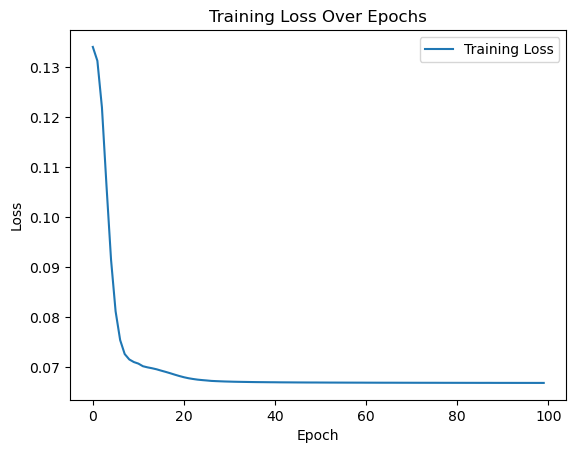

In [5]:
import numpy as np
import matplotlib.pyplot as plt

train_metrics = np.load(output_model_metrics_file)
print("Available Training metrics: ", train_metrics.files)

train_loss = train_metrics['train_loss']
valid_loss = train_metrics.get('valid_loss', None)

# Plot training loss
plt.plot(train_loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


In [ ]:
from biobb_pytorch.mdae.evaluate_model import evaluateModel

# Inputs
input_model_pth_path = "test_model.pth"
input_dataset_pt_path = "1NE4_6NO7_b.dcd.pt"

# Outputs
output_model_results_file = "test_model_results.npz"

properties = {
    'Dataset': {
        'batch_size': 4,

        }
    }

evaluateModel(
    input_model_pth_path=input_model_pth_path,
    input_dataset_pt_path=input_dataset_pt_path,
    output_results_npz_path=output_model_results_file,
    properties=properties
)


2025-07-30 01:06:56,323 [MainThread  ] [INFO ]  ## BioBB Model Evaluator ##
2025-07-30 01:06:56,324 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.evaluate_model Version: 5.0.0
2025-07-30 01:06:56,344 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/7970030f-6c56-4fda-bd3f-86ed2650fba6
2025-07-30 01:06:56,346 [MainThread  ] [INFO ]  Copy: 1NE4_6NO7_b.dcd.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/7970030f-6c56-4fda-bd3f-86ed2650fba6
2025-07-30 01:06:56,347 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-07-30 01:06:56,349 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/1NE4_6NO7_b.dcd.pt
2025-07-30 01:06:56,358 [MainThread  ] [INFO ]  Start evaluating...
2025-07-30 01:0

/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/lightning/pytorch/core/module.py:445: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`


0

Available Evaluation results:  ['xhat', 'z', 'eval_loss']
Evaluation Loss:  0.08554979372355673


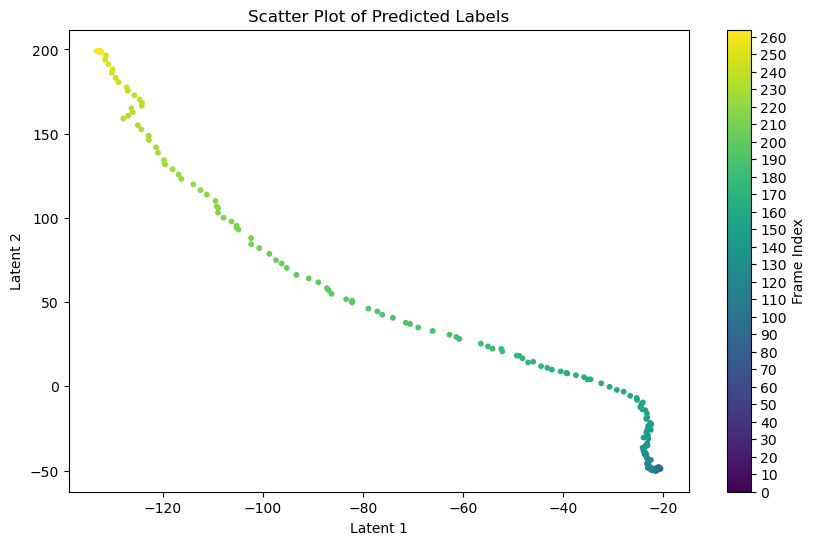

In [96]:
import numpy as np
import matplotlib.pyplot as plt

outputs = np.load(output_model_results_file, allow_pickle=True)
print("Available Evaluation results: ", outputs.files)

z = outputs['z']
eval_loss = outputs['eval_loss']

print("Evaluation Loss: ", eval_loss)

np.save("z.npy", z)

plt.figure(figsize=(10, 6))
plt.scatter(z[:, 0], z[:, 1], c=np.arange(z.shape[0]), s=10, alpha=1.0)
plt.colorbar(ticks=range(z.shape[0])[::10], label='Frame Index')
plt.xlabel('Latent 1')
plt.ylabel('Latent 2')
plt.title('Scatter Plot of Predicted Labels')
plt.show()

In [ ]:
from biobb_pytorch.mdae.encode_model import evaluateEncoder

# Inputs
input_model_pth_path = "test_model.pth"
input_dataset_pt_path = "1NE4_6NO7_b.dcd.pt"

# Outputs
output_encoder_results_file = "test_encoder_results.npz"

properties = {
    'Dataset': {
        'batch_size': 4,

        }
    }

evaluateEncoder(
    input_model_pth_path=input_model_pth_path,
    input_dataset_pt_path=input_dataset_pt_path,
    output_results_npz_path=output_encoder_results_file,
    properties=properties
)

2025-07-30 01:07:01,124 [MainThread  ] [INFO ]  ## BioBB Model Evaluator ##
2025-07-30 01:07:01,125 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.encode_model Version: 5.0.0
2025-07-30 01:07:01,126 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/1b76b295-c9b9-41aa-b9b3-c6aeec951a5e
2025-07-30 01:07:01,129 [MainThread  ] [INFO ]  Copy: 1NE4_6NO7_b.dcd.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/1b76b295-c9b9-41aa-b9b3-c6aeec951a5e
2025-07-30 01:07:01,130 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-07-30 01:07:01,132 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/1NE4_6NO7_b.dcd.pt
2025-07-30 01:07:01,141 [MainThread  ] [INFO ]  Start evaluating...
2025-07-30 01:07:

0

Available Encoded results:  ['z']


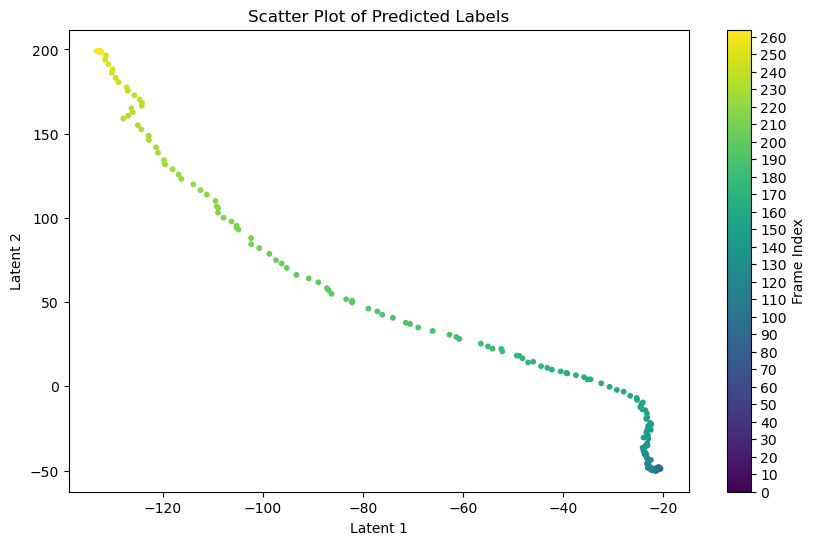

In [98]:
import numpy as np
import matplotlib.pyplot as plt

outputs = np.load(output_encoder_results_file, allow_pickle=True)
print("Available Encoded results: ", outputs.files)

z = outputs['z']

plt.figure(figsize=(10, 6))
plt.scatter(z[:, 0], z[:, 1], c=np.arange(z.shape[0]), s=10, alpha=1.0)
plt.colorbar(ticks=range(z.shape[0])[::10], label='Frame Index')
plt.xlabel('Latent 1')
plt.ylabel('Latent 2')
plt.title('Scatter Plot of Predicted Labels')
plt.show()

In [120]:
from biobb_pytorch.mdae.decode_model import evaluateDecoder

# Inputs
input_model_pth_path = "test_model.pth"
input_dataset_npy_path = "z.npy"

# Outputs
output_decoded_results_npz_path = "decoded_results.npz"

properties = {
    'Dataset': {
        'batch_size': 4,
    }
}

evaluateDecoder(input_model_pth_path=input_model_pth_path,
                    input_dataset_npy_path=input_dataset_npy_path,
                    output_results_npz_path=output_decoded_results_npz_path,
                    properties=properties)
                


2025-07-30 01:14:39,245 [MainThread  ] [INFO ]  ## BioBB Model Evaluator ##
2025-07-30 01:14:39,245 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.decode_model Version: 5.0.0
2025-07-30 01:14:39,266 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/c1ee9857-45a4-43b1-8cdf-34b739464bd8
2025-07-30 01:14:39,268 [MainThread  ] [INFO ]  Copy: z.npy to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/c1ee9857-45a4-43b1-8cdf-34b739464bd8
2025-07-30 01:14:39,268 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-07-30 01:14:39,270 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/z.npy
2025-07-30 01:14:39,270 [MainThread  ] [INFO ]  Start evaluating...
2025-07-30 01:14:39,322 [MainThread  ] [INF

0

In [ ]:
import nglview as nv
import mdtraj as md
import numpy as np

outputs = np.load("decoded_results.npz")
print("Available Decoded results: ", outputs.files)

xhat = outputs['xhat'] 

top = md.load("/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb")

original_traj = md.load(input_trajectory_file, top=top)
reconstructed_traj = md.Trajectory(xhat.reshape(len(xhat), top.n_atoms, 3), 
                                   topology=top.topology)

view = nv.show_mdtraj(reconstructed_traj)
view

Available Decoded results:  ['xhat']


NGLWidget(max_frame=264)

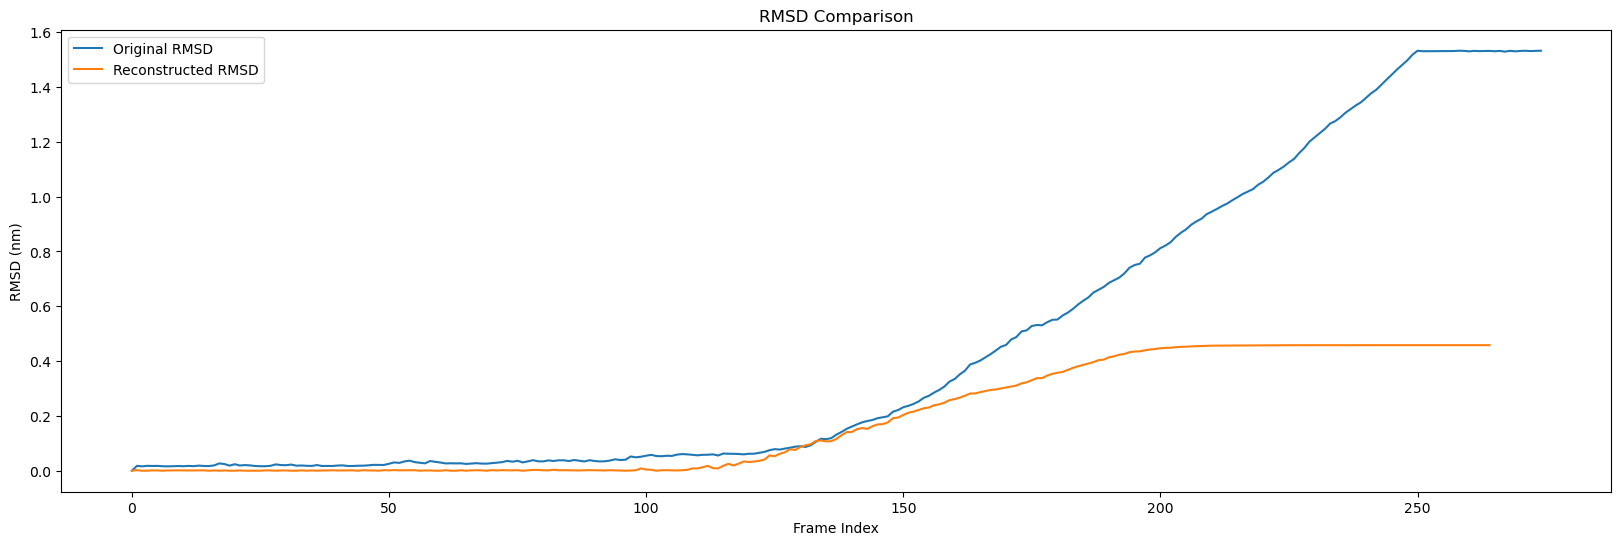

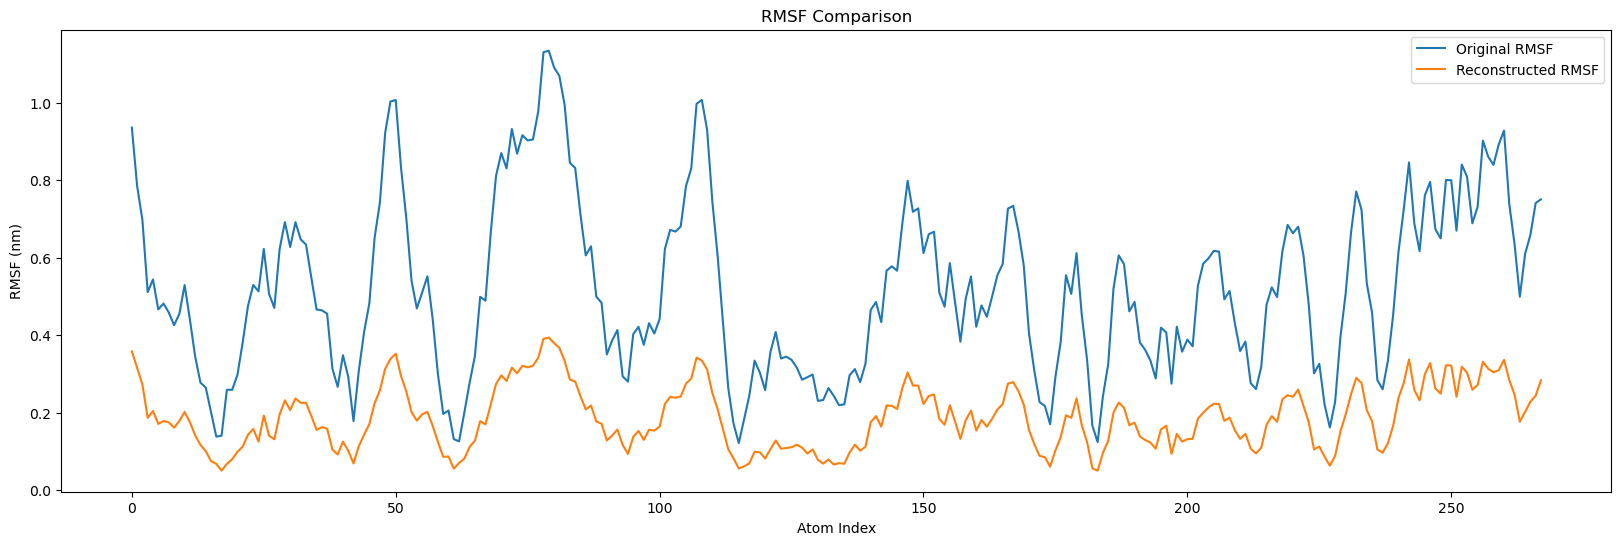

In [122]:
import matplotlib.pyplot as plt

original_rmsd = md.rmsd(original_traj, original_traj)
reconstructed_rmsd = md.rmsd(reconstructed_traj, reconstructed_traj)

original_rmsf = md.rmsf(original_traj, original_traj)
reconstructed_rmsf = md.rmsf(reconstructed_traj, reconstructed_traj)

plt.figure(figsize=(20, 6))
plt.plot(original_rmsd, label='Original RMSD')
plt.plot(reconstructed_rmsd, label='Reconstructed RMSD')
plt.xlabel('Frame Index')
plt.ylabel('RMSD (nm)')
plt.title('RMSD Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(original_rmsf, label='Original RMSF')
plt.plot(reconstructed_rmsf, label='Reconstructed RMSF')
plt.xlabel('Atom Index')
plt.ylabel('RMSF (nm)')
plt.title('RMSF Comparison')
plt.legend()
plt.show()

In [113]:
from biobb_pytorch.mdae.LRP import relevancePropagation

# Inputs
input_model_pth_path = "test_model.pth"
input_dataset_pt_path = "1NE4_6NO7_b.dcd.pt"

# Output1
output_lrp_results_npz_path1 = "lrp_results.npz"

properties={
              'Dataset': {
                  'indices': list(range(0, 20)),  
                  'batch_size': 4,
              }
}

relevancePropagation(input_model_pth_path=input_model_pth_path,
                           input_dataset_pt_path=input_dataset_pt_path,
                           output_results_npz_path=output_lrp_results_npz_path1,
                           properties=properties)

# Output2
output_lrp_results_npz_path2 = "lrp_results2.npz"

properties={
              'Dataset': {
                  'indices': list(range(240, 260)),
                  'batch_size': 4,
              }
}

relevancePropagation(input_model_pth_path=input_model_pth_path,
                           input_dataset_pt_path=input_dataset_pt_path,
                           output_results_npz_path=output_lrp_results_npz_path2,
                           properties=properties)



2025-07-30 01:11:40,326 [MainThread  ] [INFO ]  ## BioBB Layer-wise Relevance Propagation ##
2025-07-30 01:11:40,327 [MainThread  ] [INFO ]  Executing biobb_pytorch.mdae.LRP Version: 5.0.0
2025-07-30 01:11:40,356 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/b22eda90-55c2-46ee-8f7f-4d8d4a1a4ab4
2025-07-30 01:11:40,363 [MainThread  ] [INFO ]  Copy: 1NE4_6NO7_b.dcd.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/b22eda90-55c2-46ee-8f7f-4d8d4a1a4ab4
2025-07-30 01:11:40,368 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/test_model.pth
2025-07-30 01:11:40,372 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/biobb_pytorch/mdae/notebooks/1NE4_6NO7_b.dcd.pt
2025-07-30 01:11:40,386 [MainThread  ] [INFO ]  Start LRP analysis...
2025-07

0

Available LRP results:  ['global_importance', 'global_importance_raw']


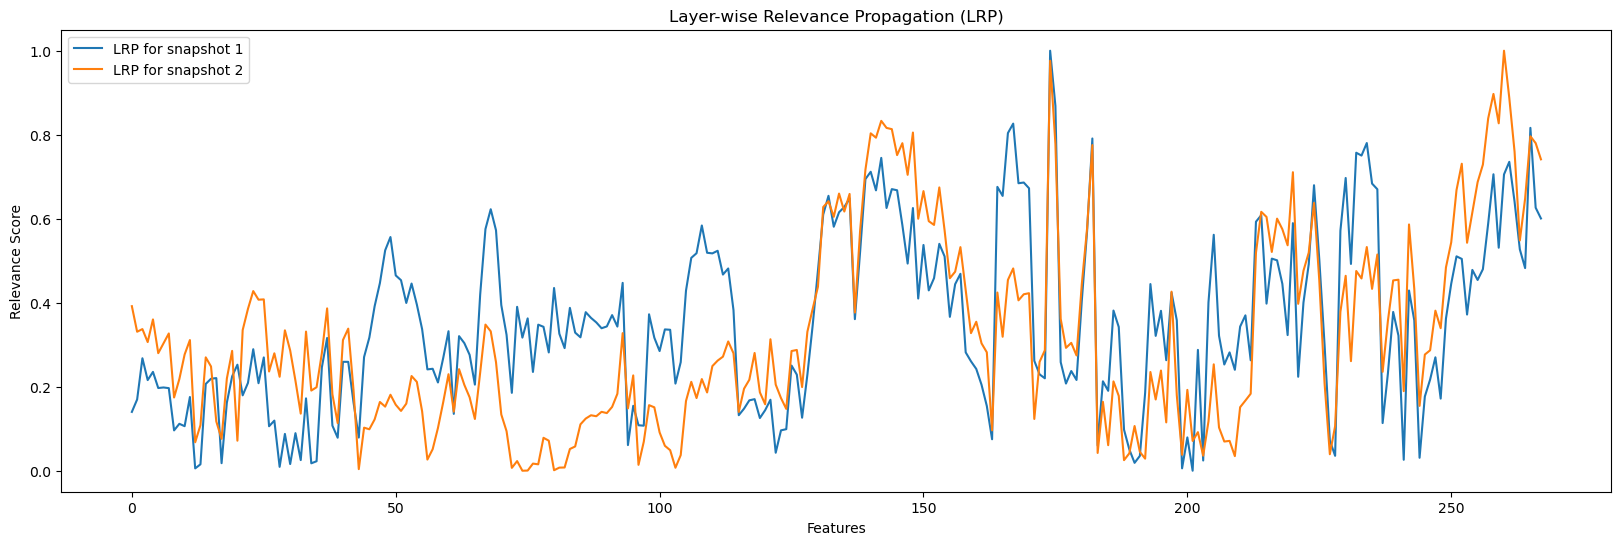

In [117]:
import numpy as np
import matplotlib.pyplot as plt

outputs1 = np.load(output_lrp_results_npz_path1, allow_pickle=True)
importance_first_frame = outputs1['global_importance']

outputs2 = np.load(output_lrp_results_npz_path2, allow_pickle=True)
importance_last_frame = outputs2['global_importance']

print("Available LRP results: ", outputs1.files)

plt.figure(figsize=(20, 6))
plt.plot(importance_first_frame, label='LRP for snapshot 1')
plt.plot(importance_last_frame, label='LRP for snapshot 2')
plt.xlabel('Features')
plt.ylabel('Relevance Score')
plt.title('Layer-wise Relevance Propagation (LRP)')
plt.legend()
plt.show()
